# Regresión Red Simple (Perceptrón Multicapa)
## Imports Necesarios

In [51]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor

# Cargar Datos de Entrada

In [52]:
#cargamos los datos de entrada
#header=0,
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/wf1_train_fin_serie.csv", index_col=0)

# Ver los 1ros registros
data.head()

,ws,wp1t-44,wp1t-43,wp1t-42,wp1t-41,wp1t-40,wp1t-39,wp1t-38,wp1t-37,wp1t-36,...,wp1t-9,wp1t-8,wp1t-7,wp1t-6,wp1t-5,wp1t-4,wp1t-3,wp1t-2,wp1t-1,wp1
100,0.81,0.035,0.005,0.000,0.000,0.010,0.025,0.03,0.01,0.00,...,0.01,0.01,0.010,0.010,0.010,0.080,0.025,0.08,0.0,0.000
101,0.68,0.005,0.000,0.000,0.010,0.025,0.030,0.01,0.00,0.01,...,0.01,0.01,0.010,0.010,0.080,0.025,0.080,0.00,0.0,0.000
102,0.49,0.000,0.000,0.010,0.025,0.030,0.010,0.00,0.01,0.00,...,0.01,0.01,0.010,0.080,0.025,0.080,0.000,0.00,0.0,0.000
103,0.57,0.000,0.010,0.025,0.030,0.010,0.000,0.01,0.00,0.00,...,0.01,0.01,0.080,0.025,0.080,0.000,0.000,0.00,0.0,0.000
104,0.88,0.010,0.025,0.030,0.010,0.000,0.010,0.00,0.00,0.00,...,0.01,0.08,0.025,0.080,0.000,0.000,0.000,0.00,0.0,0.015


# Separar Datos de Entrenamiento (Train) y Test

In [53]:
#data_train = data.sample(frac=1,random_state=200) 
#data_test = data.drop(data_train.index) 

# 75% train y 25% test
data_train, data_test = train_test_split(data, test_size=0.2, random_state=200)

dataset_train = data_train.values
x_train = dataset_train[:,0:44]
y_train = dataset_train[:,44]

dataset_test = data_test.values
x_test = dataset_test[:,0:44]
y_test = dataset_test[:,44]


In [54]:
x_train[0]

array([2.54 , 0.05 , 0.03 , 0.   , 0.   , 0.04 , 0.04 , 0.09 , 0.125,
       0.085, 0.055, 0.085, 0.211, 0.266, 0.16 , 0.075, 0.175, 0.12 ,
       0.015, 0.05 , 0.07 , 0.005, 0.   , 0.03 , 0.02 , 0.075, 0.105,
       0.16 , 0.18 , 0.231, 0.306, 0.286, 0.246, 0.306, 0.306, 0.306,
       0.316, 0.381, 0.411, 0.426, 0.391, 0.346, 0.02 , 0.03 ])

In [55]:
y_train[0]

0.02

## Crear Modelo, Entrenarlo y Predecir

In [63]:
neuronas = 792

nn = MLPRegressor(
    hidden_layer_sizes=(neuronas,),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=10, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

hist=nn.fit(x_train, y_train)

#test_x = np.array(x)

y_pred_train = nn.predict(x_train)
y_pred_test = nn.predict(x_test)

Iteration 1, loss = 0.00617600
Iteration 2, loss = 0.00365185
Iteration 3, loss = 0.00316084
Iteration 4, loss = 0.00294901
Iteration 5, loss = 0.00286256
Iteration 6, loss = 0.00280619
Iteration 7, loss = 0.00276205
Iteration 8, loss = 0.00274529
Iteration 9, loss = 0.00270802
Iteration 10, loss = 0.00268468
Iteration 11, loss = 0.00266588
Iteration 12, loss = 0.00267415
Iteration 13, loss = 0.00266423
Iteration 14, loss = 0.00262606
Iteration 15, loss = 0.00262629
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


## Obtener Metricas del Modelo

In [64]:
#print('Coefficients: \n', nn.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
#print('Score : {:.3f}'.format(nn.score(x_test, y_test)))
#print('num of layers: ', nn.n_layers_)
print('R^2: ', nn.score(x_train, y_train)) 
print('R^2 B: ', r2_score(y_train, y_pred_train)) 
print('current loss computed with the loss function: ', nn.loss_)

Mean squared error: 0.01
R^2:  0.9039930568440987
R^2 B:  0.9039930568440987
current loss computed with the loss function:  0.0026262871652389264


## Graficar Resultados

In [65]:
#pred_train = y_predict
pred_test_plot = y_pred_test[2000:2050]
y_test_plot = y_test[2000:2050]
corr = np.corrcoef(y_test, y_pred_test)

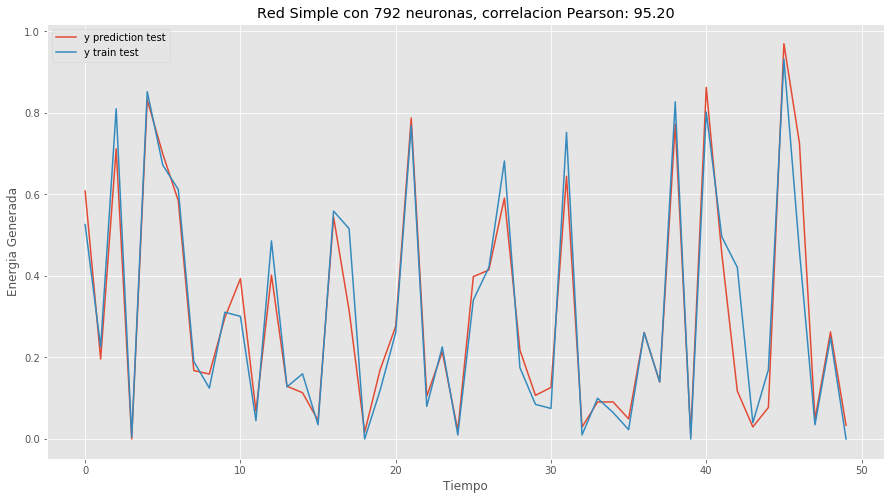

In [66]:
plt.plot(pred_test_plot, label ="y prediction test")
plt.plot(y_test_plot, label ="y train test")
#plt.plot(trainPredictPlot, label ="train pred" )
plt.title("Red Simple con %i neuronas, correlacion Pearson: %.2f" % (neuronas, corr[1][0] * 100))
plt.ylabel("Energia Generada")
plt.xlabel("Tiempo")
plt.legend()
plt.show()

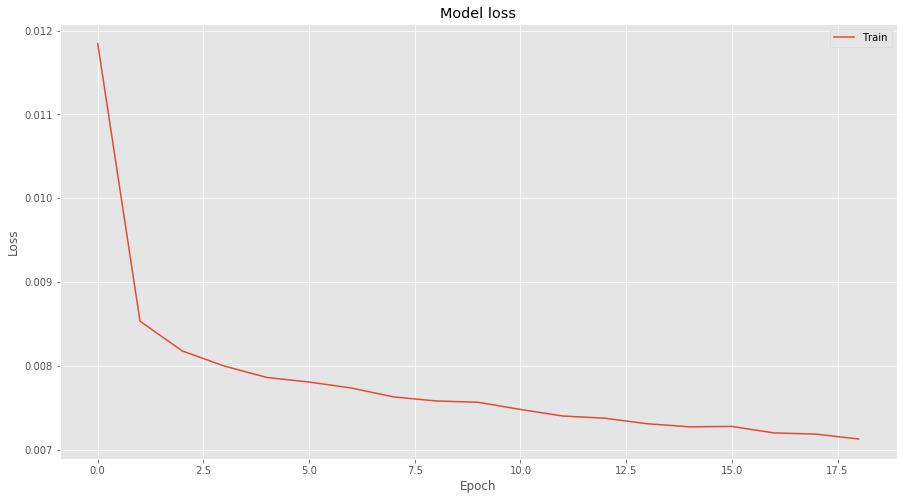

In [32]:
# Plot training & validation loss values
plt.plot(nn.loss_curve_)
#plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

#pd.DataFrame(model.loss_curve_).plot()

In [33]:
#pd.DataFrame(nn.loss_curve_).plot()

In [48]:
from sklearn.model_selection import learning_curve

#train_sizes = [1, 100, 500, 2000, 5000, 7654]
train_sizes = [0.05, 0.15,0.5, 0.75, 1]

train_sizes, train_scores, valid_scores = learning_curve(
                                                        MLPRegressor(hidden_layer_sizes=(neuronas,),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.0001, power_t=0.5, max_iter=1000, shuffle=True,
    random_state=0, tol=0.0001, verbose=10, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08
                                                                     ), 
                                                        x_train, 
                                                        y_train, 
                                                        train_sizes=train_sizes, 
                                                        cv=5,
                                                        random_state=0,
                                                        scoring = 'neg_mean_squared_error')

Iteration 1, loss = 0.02442898
Iteration 2, loss = 0.01615900
Iteration 3, loss = 0.01259924
Iteration 4, loss = 0.01119151
Iteration 5, loss = 0.01035494
Iteration 6, loss = 0.00995084
Iteration 7, loss = 0.00966346
Iteration 8, loss = 0.00943213
Iteration 9, loss = 0.00930415
Iteration 10, loss = 0.00917187
Iteration 11, loss = 0.00898563
Iteration 12, loss = 0.00885534
Iteration 13, loss = 0.00877533
Iteration 14, loss = 0.00874828
Iteration 15, loss = 0.00863917
Iteration 16, loss = 0.00852194
Iteration 17, loss = 0.00848940
Iteration 18, loss = 0.00839149
Iteration 19, loss = 0.00831001
Iteration 20, loss = 0.00833644
Iteration 21, loss = 0.00820895
Iteration 22, loss = 0.00816139
Iteration 23, loss = 0.00811234
Iteration 24, loss = 0.00812961
Iteration 25, loss = 0.00802700
Iteration 26, loss = 0.00808874
Iteration 27, loss = 0.00797069
Iteration 28, loss = 0.00795729
Iteration 29, loss = 0.00790299
Iteration 30, loss = 0.00787422
Iteration 31, loss = 0.00786070
Iteration 32, los

Iteration 23, loss = 0.00736057
Iteration 24, loss = 0.00736124
Iteration 25, loss = 0.00735443
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.01070790
Iteration 2, loss = 0.00860792
Iteration 3, loss = 0.00830810
Iteration 4, loss = 0.00809078
Iteration 5, loss = 0.00798292
Iteration 6, loss = 0.00787792
Iteration 7, loss = 0.00780300
Iteration 8, loss = 0.00777653
Iteration 9, loss = 0.00770449
Iteration 10, loss = 0.00770530
Iteration 11, loss = 0.00758183
Iteration 12, loss = 0.00757799
Iteration 13, loss = 0.00749183
Iteration 14, loss = 0.00746376
Iteration 15, loss = 0.00740006
Iteration 16, loss = 0.00736548
Iteration 17, loss = 0.00735661
Iteration 18, loss = 0.00727030
Iteration 19, loss = 0.00726235
Iteration 20, loss = 0.00721485
Iteration 21, loss = 0.00718333
Iteration 22, loss = 0.00717818
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.0234271

Iteration 2, loss = 0.00895728
Iteration 3, loss = 0.00850967
Iteration 4, loss = 0.00832805
Iteration 5, loss = 0.00817573
Iteration 6, loss = 0.00806239
Iteration 7, loss = 0.00794471
Iteration 8, loss = 0.00787622
Iteration 9, loss = 0.00782521
Iteration 10, loss = 0.00771316
Iteration 11, loss = 0.00776838
Iteration 12, loss = 0.00767942
Iteration 13, loss = 0.00758959
Iteration 14, loss = 0.00760431
Iteration 15, loss = 0.00751239
Iteration 16, loss = 0.00747679
Iteration 17, loss = 0.00748131
Iteration 18, loss = 0.00742180
Iteration 19, loss = 0.00736122
Iteration 20, loss = 0.00737034
Iteration 21, loss = 0.00730923
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 0.01134180
Iteration 2, loss = 0.00893432
Iteration 3, loss = 0.00838323
Iteration 4, loss = 0.00819238
Iteration 5, loss = 0.00810597
Iteration 6, loss = 0.00831825
Iteration 7, loss = 0.00787444
Iteration 8, loss = 0.00782091
Iteration 9, loss = 0.00775447

In [49]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1493     0.014834
4480     0.015291
14934    0.014531
22401    0.014576
29868    0.014210
dtype: float64

 --------------------

Mean validation scores

 1493     0.017242
4480     0.016305
14934    0.015298
22401    0.015026
29868    0.014791
dtype: float64


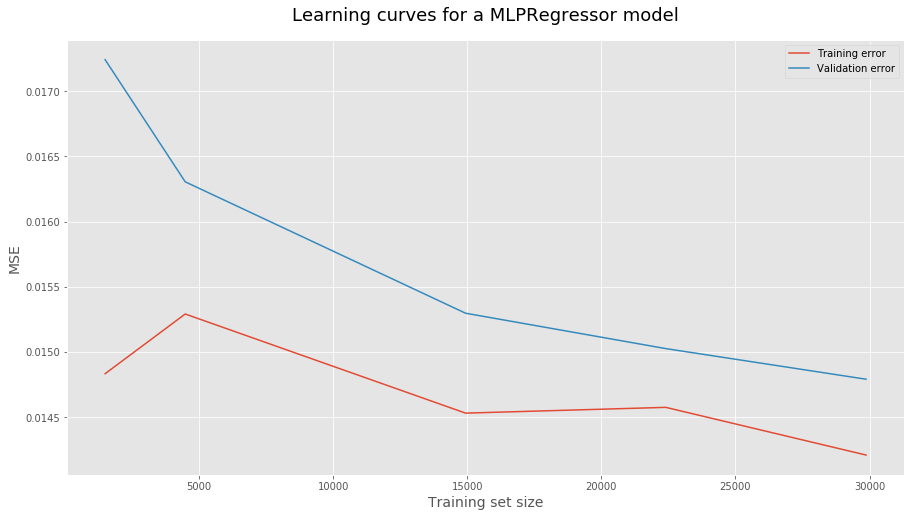

In [50]:
#plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)

title = 'Learning curves for a ' + str(MLPRegressor()).split('(')[0] + ' model'
plt.title(title, fontsize = 18, y = 1.03)
plt.legend()

## Validation test

In [204]:

#MLPRegressor().get_params().keys()
#sorted(sklearn.metrics.SCORERS.keys())

[0.0414801  0.02984462 0.02959255 0.03424484 0.0308069  0.03075902
 0.0312092  0.03807712 0.03185098 0.02902291 0.03072645 0.02924154
 0.03473017 0.03077043 0.02931822 0.02896122 0.0293158  0.03140952
 0.03681622 0.02952147 0.03055767 0.03010072 0.0381202  0.03105191
 0.03014593]


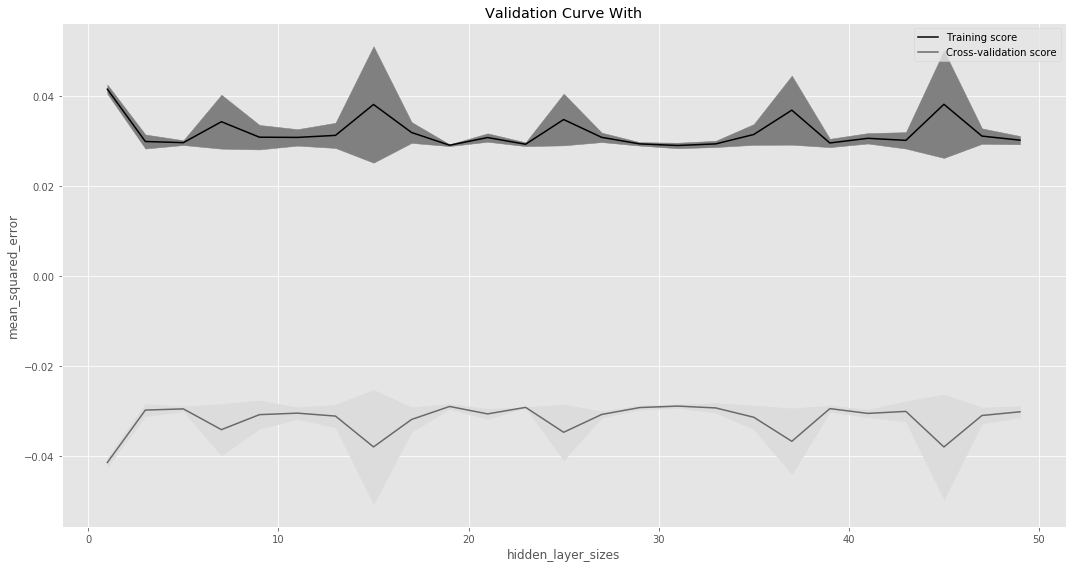

In [160]:
from sklearn.model_selection import validation_curve

# Create range of values for parameter
param_range = np.arange(1, 50, 2)

# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(MLPRegressor(), 
                                             x_train, 
                                             y_train, 
                                             param_name="hidden_layer_sizes", 
                                             param_range=param_range,
                                             cv=3, 
                                             scoring="neg_mean_squared_error", 
                                             n_jobs=-1)

# Calculate mean and standard deviation for training set scores
#train_mean = np.mean(train_scores, axis=1)
#train_std = np.std(train_scores, axis=1)

train_mean = -train_scores.mean(axis = 1)
train_std = -train_scores.std(axis = 1)

print (train_mean)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With")
plt.xlabel("hidden_layer_sizes")
plt.ylabel("mean_squared_error")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [251]:
## Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:

y_12 = nn.predict([[3.66,106.24,2009,7]])
print(y_12)

[0.13636744]


In [252]:
#print('coefficients: ', nn.coefs_[1] )
#len(nn.coefs_[0][1])

print(nn.coefs_[1][89])

coef1 = nn.coefs_[0][0]
coef2 = nn.coefs_[0][1]
coef3 = nn.coefs_[0][2]
#coef4 = nn.coefs_[0][3]

#print( len(coef4) )

print(coef1[89])
print(coef2[89])
print(coef3[89])
#print(coef4[89])


[0.19731277]
0.22686566922004597
-0.09169792041786326
0.06543440191428704


## Guarda Datos Predicción

In [33]:
df_pred = pd.DataFrame(data=pred_test_plot, columns=["pred"])
#df_pred
df_pred.to_csv('/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/pred_iter1_redNN.csv')

